<a href="https://colab.research.google.com/github/Asifbbl/Web-Scraping-IMdb-dataset/blob/main/IMDB_Data_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web scraping from IMDB Website**

**Web Scraping :-** Web scraping is the process of using bots to extract content and data from a website.
Unlike screen scraping, which only copies pixels displayed onscreen, web scraping extracts underlying HTML code and, with it, data stored in a database. The scraper can then replicate entire website content elsewhere.

Web scraping is used in a variety of digital businesses that depend on data harvesting. Legitimate use cases include:


*   Search engine bots crawling a site, analyzing its content and then ranking it.

*   Price comparison sites deploying bots to auto-fetch prices and product descriptions for allied seller websites.

*   Market research companies using scrapers to pull data from forums and social media (e.g., for sentiment analysis).






Web scraping is also used for illegal purposes, including the undercutting of prices and the theft of copyrighted content. An online entity targeted by a scraper can suffer severe financial losses, especially if it’s a business strongly relying on competitive pricing models or deals in content distribution.


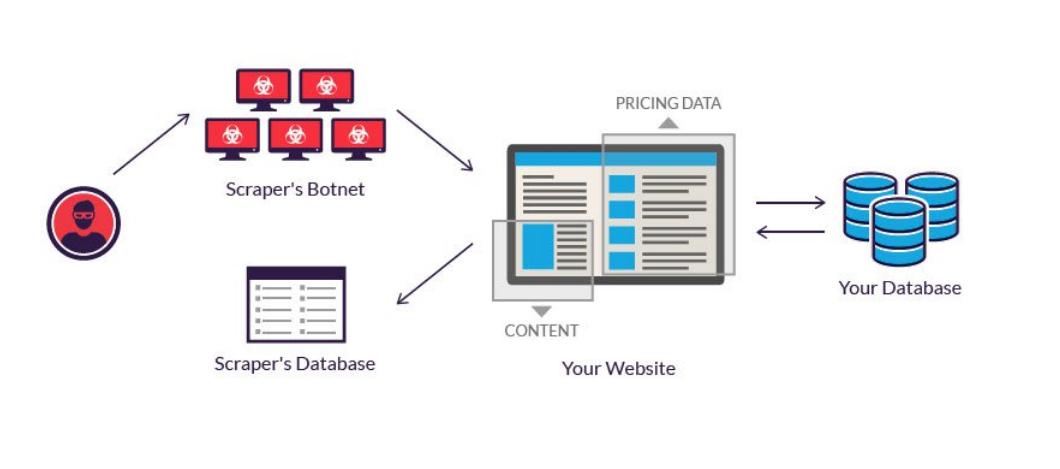

In [ ]:
# Install the request 
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# install bs4 
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1270 sha256=232878f6cb954ffea4303aa2880784843069783bfe1e416c7f1caf276c27c5d9
  Stored in directory: /root/.cache/pip/wheels/73/2b/cb/099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


In [ ]:
# import library used in web scraping 
from bs4 import BeautifulSoup
import requests

In [ ]:
import openpyxl

In [ ]:

  try :
    sheet =[]
    # request url to excess
    source = requests.get('https://www.imdb.com/chart/top/')

    #Check the url is excess or not 
    source.raise_for_status()
    
    #excess html text from the URL
    soup = BeautifulSoup(source.text, 'html.parser')
     
     #excess t body text
    movies = soup.find('tbody', class_='lister-list').find_all('tr')
    
    # Find the number of movies in the dataset
    print(f'Total number of movies in the imdb dataset : {len(movies)} \n ')
    
    for movie in movies:

      #Excess the Rank of the movies
      rank = movie.find('td', class_="titleColumn").get_text(strip=True).split('.')[0]

      # Excess the Name of the movies from the dataset
      name = movie.find('td', class_="titleColumn").a.text

      #Excess the year on which movies is released
      year = movie.find('td', class_="titleColumn").span.text.strip('()')

      #Excess the rating of the movies
      rating = movie.find('td', class_='ratingColumn imdbRating').strong.text
      
      
      sheet.append([rank,name,year,rating])
        
      


  except Exception as e:
    print(f'The given code is not running properly because {e}')

Total number of movies in the imdb dataset : 250 
 


In [ ]:
sheet[1]

['2', 'The Godfather', '1972', '9.2']

In [ ]:
import pandas as pd


In [ ]:
df= pd.DataFrame(sheet,columns=['Rank','Name of Movies', 'Year of release','Rating'])
df.to_csv('Top 250 movies.csv')